In [7]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df_diabetes = pd.read_csv("C:/Users/SOMYA/Downloads/archive (1)/diabetes.csv")  # Adjust path if needed

# Basic exploration
print("Shape of dataset:", df_diabetes.shape)
print("\nColumn Names:\n", df_diabetes.columns)
print("\nFirst 5 rows:\n", df_diabetes.head())
print("\nInfo:\n", df_diabetes.info())
print("\nMissing values:\n", df_diabetes.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df_diabetes.describe())

Shape of dataset: (768, 9)

Column Names:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data column

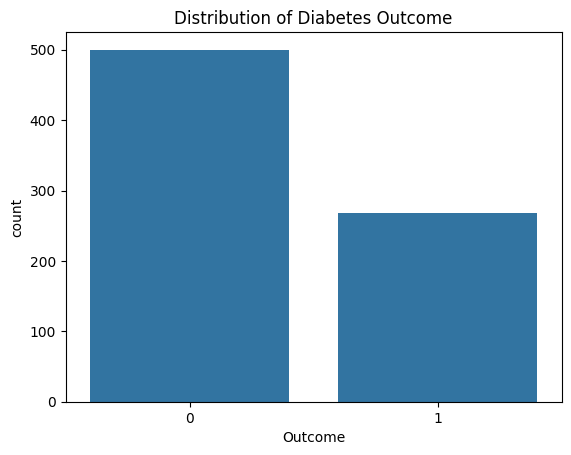

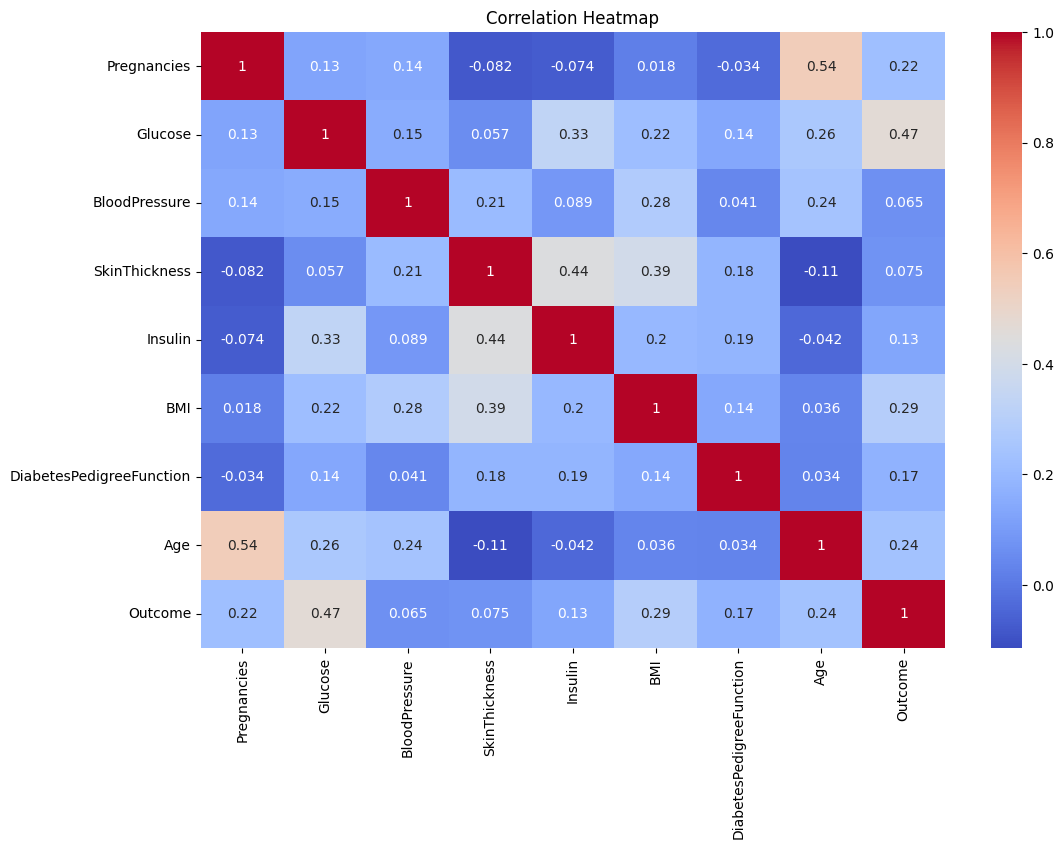

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
sns.countplot(x='Outcome', data=df_diabetes)
plt.title("Distribution of Diabetes Outcome")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_diabetes.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluation
print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

🔹 Logistic Regression Results
Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
 [[79 20]
 [18 37]]


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # No need for scaled data here

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("🔹 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

🔹 Decision Tree Results
Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
 [[75 24]
 [15 40]]


In [8]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org xgboost

In [9]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\n🔹 XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

🔹 Random Forest
Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
 [[77 22]
 [21 34]]

🔹 XGBoost
Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

Confusion Matrix:
 [[72 27]
 [16 39]]


C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:31:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [11]:
from sklearn.model_selection import GridSearchCV

# Parameters to tune
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# Predict with best model
y_pred_best_rf = best_rf.predict(X_test)
print("Accuracy after tuning:", accuracy_score(y_test, y_pred_best_rf))

Best Params: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy after tuning: 0.7467532467532467


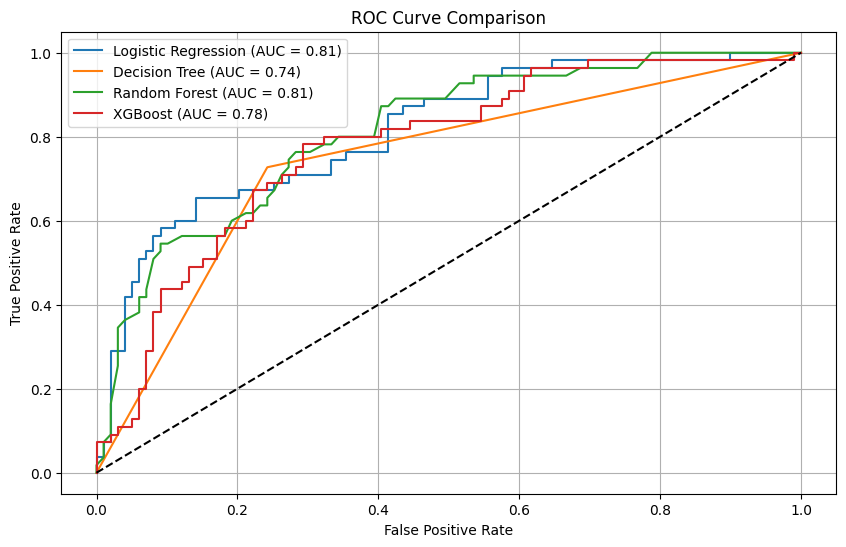

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilities
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    if name == 'Logistic Regression':
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_probs = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()